In [20]:
from __future__ import print_function
import os
data_path = ['data']


In [21]:
import pandas as pd

# Import the data using the file path
filepath = os.sep.join(data_path + ['cirrhosis.csv'])
data = pd.read_csv('cirrhosis.csv')
data

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,681,D,NaN,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,415,1103,C,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,416,1055,C,NaN,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,417,691,C,NaN,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0


In [22]:
data.head(1).T

,0
ID,1
N_Days,400
Status,D
Drug,D-penicillamine
Age,21464
Sex,F
Ascites,Y
Hepatomegaly,Y
Spiders,Y
Edema,Y


In [23]:
# Remove extraneous columns
data.drop(['ID','N_Days','Age','Bilirubin','Cholesterol','Albumin','Copper','Alk_Phos','SGOT','Tryglicerides','Platelets','Prothrombin'], axis=1, inplace=True)
data

,Status,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema,Stage
0,D,D-penicillamine,F,Y,Y,Y,Y,4.0
1,C,D-penicillamine,F,N,Y,Y,N,3.0
2,D,D-penicillamine,M,N,N,N,S,4.0
3,D,D-penicillamine,F,N,Y,Y,S,4.0
4,CL,Placebo,F,N,Y,Y,N,3.0
...,...,...,...,...,...,...,...,...
413,D,NaN,F,NaN,NaN,NaN,N,3.0
414,C,NaN,F,NaN,NaN,NaN,N,4.0
415,C,NaN,F,NaN,NaN,NaN,N,3.0
416,C,NaN,F,NaN,NaN,NaN,N,3.0


In [25]:
import warnings

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [27]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in ['Status','Sex','Ascites','Drug','Hepatomegaly','Spiders','Edema','Stage']:
    data[col] = le.fit_transform(data[col])
data

,Status,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema,Stage
0,2,0,0,1,1,1,2,3
1,0,0,0,0,1,1,0,2
2,2,0,1,0,0,0,1,3
3,2,0,0,0,1,1,1,3
4,1,1,0,0,1,1,0,2
...,...,...,...,...,...,...,...,...
413,2,2,0,2,2,2,0,2
414,0,2,0,2,2,2,0,3
415,0,2,0,2,2,2,0,2
416,0,2,0,2,2,2,0,2


In [28]:
x_cols = [x for x in data.columns if x != 'Stage']
X_data = data[x_cols]
y_data = data['Stage']


In [29]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

knn = knn.fit(X_data, y_data)

y_pred = knn.predict(X_data)

In [30]:
def accuracy(real, predict):
    return sum(y_data == y_pred) / float(real.shape[0])
print(accuracy(y_data, y_pred))

0.44976076555023925


In [31]:
score_list = list()

for k in range(1, 21):
    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn = knn.fit(X_data, y_data)
    
    y_pred = knn.predict(X_data)
    score = accuracy(y_data, y_pred)
    
    score_list.append((k, score))
    
score_df = pd.DataFrame(score_list, columns=['k', 'accuracy'])


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

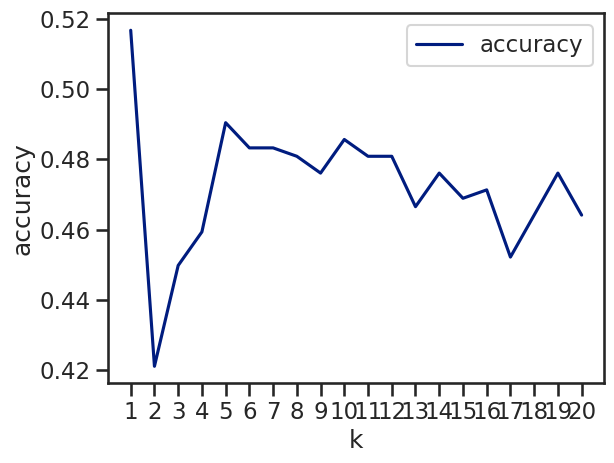

In [33]:
sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = score_df.set_index('k').plot()

ax.set(xlabel='k', ylabel='accuracy')
ax.set_xticks(range(1, 21));